# MS4610 - Introduction To Data Anlyatics

#### TEAM 9
- Saarthak Sandip Marathe - ME17B162
- Burhanuddin Sabuwala - BE17B011
- G Prashant - BS17B011
- Raj Jain - CH17B066
- Sriram Ragunathan - CH17B072
- Shashank H S - BE18B006

# Project - Loan Default Prediction

## Importing Packages

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.decomposition import PCA
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate, StratifiedKFold, KFold
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,recall_score,roc_auc_score,roc_curve
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier, Pool, cv
from lightgbm import LGBMClassifier
from tqdm import tqdm
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [29]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Training and Test Data

In [30]:
fx = pd.read_csv("/content/drive/MyDrive/MyPC/Sem 7/IDA project/train_x.csv").set_index('ID')
fy = pd.read_csv("/content/drive/MyDrive/MyPC/Sem 7/IDA project/train_y.csv").set_index('ID')
test_data = pd.read_csv("/content/drive/MyDrive/MyPC/Sem 7/IDA project/test_x.csv").set_index('ID_Test')

## Imputation of Categorical and Ordinal Features

The Ordinal (Age) and Categorical features (Loan Type, Occupation Type) were imputed with the most frequent value corresponding to the class

In [31]:
from scipy import stats
print('Most Frequent Age for Class 0: ',stats.mode(fx['Age'].loc[(fy==0)['Label']])[0][0])
print('Most Frequent Loan Type for Class 0: ',stats.mode(fx['Loan type'].loc[(fy==0)['Label']])[0][0])
print('Most Frequent Occupation Type for Class 0: ',stats.mode(fx['Occupation type'].loc[(fy==0)['Label']])[0][0])
print()
print('Most Frequent Age for Class 1: ',stats.mode(fx['Age'].loc[(fy==1)['Label']])[0][0])
print('Most Frequent Loan Type for Class 1: ',stats.mode(fx['Loan type'].loc[(fy==1)['Label']])[0][0])
print('Most Frequent Occupation Type for Class 1: ',stats.mode(fx['Occupation type'].loc[(fy==1)['Label']])[0][0])

Most Frequent Age for Class 0:  0.0
Most Frequent Loan Type for Class 0:  A
Most Frequent Occupation Type for Class 0:  Y

Most Frequent Age for Class 1:  1.0
Most Frequent Loan Type for Class 1:  B
Most Frequent Occupation Type for Class 1:  Y


In [32]:
#Age Feature
id = fx['Age'][np.isnan(fx['Age'])].index
id1 = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 0)['Label']].index 
fx['Age'].loc[id1] = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 0)['Label']].replace(np.nan, 0)

id2 = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 1)['Label']].index 
fx['Age'].loc[id2] = fx['Age'][np.isnan(fx['Age'])][(fy.loc[np.array(id)] == 1)['Label']].replace(np.nan, 1)

#Loan Type Feature
id =  fx['Loan type'][pd.isnull(fx['Loan type'])].index

id1 = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 0)['Label']].index 
fx['Loan type'].loc[id1] = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 0)['Label']].replace(np.nan, 'A')

id2 = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 1)['Label']].index 
fx['Loan type'].loc[id2] = fx['Loan type'][pd.isnull(fx['Loan type'])][(fy.loc[np.array(id)] == 1)['Label']].replace(np.nan, 'B')

#Occupation Type Feature
id =  fx['Occupation type'][pd.isnull(fx['Occupation type'])].index
fx['Occupation type'].loc[id] =  fx['Occupation type'].loc[id].replace(np.nan,'Y')

## Iterative Imputation for Numerical Features

In [33]:
# Iterative imputer
imp = IterativeImputer(missing_values = np.nan, max_iter = 10, random_state = 42,verbose=1)

# One Hot Encoding of categorical features Loan Type and Occupation Type
fx_loan_type = pd.get_dummies(fx['Loan type'], prefix = 'Loan type')
fx_occupation = pd.get_dummies(fx['Occupation type'], prefix = 'Occupation type')

cols = list(fx.columns);
cols.remove('Loan type'); cols.remove('Occupation type');

fx = pd.concat([fx[cols], fx_loan_type, fx_occupation],axis = 1)
imp.fit(fx)
p = list(imp.transform(fx))
y = list(fy['Label'])

[IterativeImputer] Completing matrix with shape (80000, 13)
[IterativeImputer] Change: 4072.2446953765193, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 4066.959594631126, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 760.2445291387521, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 548.4206595597784, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 397.30854102846934, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 253.810880458469, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 191.99084863988764, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 254.86686987255734, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 34.70309814903885, scaled tolerance: 20.72891533 
[IterativeImputer] Change: 17.867956365225382, scaled tolerance: 20.72891533 
[IterativeImputer] Early stopping criterion reached.
[IterativeImputer] Completing matrix with shape (80000, 13)


## Preprocessing 

We have included only those data points that have proper labels, and ignored those that have missing labels.

In [34]:
# Including values that have labels in the final dataset
x_matrix = []
y_matrix = []
for i in range(len(p)):
    if fy['Label'][i+1] in [0,1]:
      x_matrix.append(p[i])
      y_matrix.append(y[i])

df_x = pd.DataFrame(x_matrix, columns = fx.columns)
df_y = y_matrix

## Model Used for Training - Light Gradient Boosted Machine (LightGBM)

### Initialize Model

In [35]:
#Instantiating LightGBM Classifier Model with 3300 estimators
lgbm_clf = LGBMClassifier(n_estimators=3300,
                       max_depth=9,
                       learning_rate=0.12, 
                       objective='binary',
                       subsample=0.7,
                       colsample_bytree=1.,
                       num_parallel_tree = 10,
                       scale_pos_weight=2.20,
                       random_state=123,
                       reg_alpha = 0,
                       )

### Model Evaluation Using 10-fold Cross Validation

In [36]:
## 10 fold Cross Validation using LGBM Classifier Initialized above

# Initializing k-fold splitter
n_splits = 10   # 10 splits
kf = KFold(n_splits=n_splits,shuffle=True,random_state = 230)
# PCA
pca = PCA(n_components=10)

# For tracking metrics
train_score,val_score,f1,prec,rec,roc_auc = [],[],[],[],[],[]

for train_index, test_index in tqdm(kf.split(df_x)):
  # Train-Validation Split
  X_train, X_val = df_x.loc[train_index], df_x.loc[test_index]
  y_train, y_val = np.array(df_y)[train_index], np.array(df_y)[test_index]

  # PCA fitting and transformation of Training Data
  pca_X_train = pca.fit_transform(X_train)

  # PCA transformation of Validation Data
  pca_X_val = pca.transform(X_val)

  # Model Fitting using PCA transformed training data
  lgbm_clf.fit(pca_X_train,y_train)

  # Predict train labels
  y_train_pred = lgbm_clf.predict(pca_X_train)
  # Predict Probabilities for Validation
  y_val_prob = lgbm_clf.predict_proba(pca_X_val)[:,1]
  # Predict labels for Validation
  # y_pred_val = lgbm_clf.predict(pca_X_val) 
  y_pred_val = (y_val_prob>0.2)*1


  # Train Accuracy
  train_score.append(accuracy_score(y_train,y_train_pred)) 
  # Validation Accuracy
  val_score.append(accuracy_score(y_val,y_pred_val))
  # F1 Score
  f1.append(f1_score(y_val,y_pred_val))
  # Precision
  prec.append(precision_score(y_val,y_pred_val))
  # Recall
  rec.append(recall_score(y_val,y_pred_val))
  # ROC AUC
  roc_auc.append(roc_auc_score(y_val,y_val_prob))

print('\n')
print('\033[1mTraining Accuracy: \033[0m' + str(np.mean(np.array(train_score)))+' +/- '+str(1.96*np.std(np.array(train_score))/np.sqrt(n_splits)))
print('\033[1mValidation Accuracy: \033[0m'+ str(np.mean(np.array(val_score)))+' +/- '+str(1.96*np.std(np.array(val_score))/np.sqrt(n_splits)))
print('\033[1mF1 Score: \033[0m' + str(np.mean(np.array(f1)))+' +/- '+str(1.96*np.std(np.array(f1))/np.sqrt(n_splits)))
print('\033[1mPrecision: \033[0m'+str(np.mean(np.array(prec)))+' +/- '+str(1.96*np.std(np.array(prec))/np.sqrt(n_splits)))
print('\033[1mRecall: \033[0m' + str(np.mean(np.array(rec)))+' +/- '+str(1.96*np.std(np.array(rec))/np.sqrt(n_splits)))
print('\033[1mROC AUC: \033[0m' + str(np.mean(np.array(roc_auc)))+' +/- '+str(1.96*np.std(np.array(roc_auc))/np.sqrt(n_splits)))

10it [06:01, 36.16s/it]



Training Accuracy: 1.0 +/- 0.0
Validation Accuracy: 0.9864252046775649 +/- 0.0008528323387918677
F1 Score: 0.8926428352620066 +/- 0.007381654896401563
Precision: 0.9340945823450866 +/- 0.0060790665387295256
Recall: 0.8550861558451306 +/- 0.01394369757251419
ROC AUC: 0.9780731749913057 +/- 0.0020134067128612086


### Training the model with all data

In [38]:
lgbm_clf = LGBMClassifier(n_estimators=3300,
                       max_depth=9,
                       learning_rate=0.12, 
                       objective='binary',
                       subsample=0.7,
                       colsample_bytree=1.,
                       num_parallel_tree = 10,
                       scale_pos_weight=2.20,
                       random_state=123,
                       reg_alpha = 0,
                       )
#PCA Transformation of all data
pca = PCA(n_components=10)
pca_X_all = pca.fit_transform(df_x)
#Fitting all data using LightGBM model
lgbm_clf.fit(pca_X_all,np.array(df_y))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.12, max_depth=9,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3300, n_jobs=-1, num_leaves=31,
               num_parallel_tree=10, objective='binary', random_state=123,
               reg_alpha=0, reg_lambda=0.0, scale_pos_weight=2.2, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

### One-Hot Encoding and PCA of Test Data

In [39]:
# OHE and PCA transformation of test data
pca_test = pca.transform(pd.get_dummies(test_data))

### Predicting Test Labels

In [44]:
#Predicting Test dataset labels with 0.2 threshold 
y_pred_test = (lgbm_clf.predict_proba(pca_test)[:,1]>0.2)*1

In [45]:
# Counting the number of zeros and ones
unique, counts = np.unique(y_pred_test, return_counts=True)
count_labels = dict(zip(unique, counts))
count_labels

{0: 7134, 1: 12866}

As observed from the predictions of the test dataset, more than 64% of the data have predicted labels as Class 1, i.e., loan defaulter. 

In [46]:
# Saving Predictions
np.savetxt('pred_y.csv',y_pred_test.astype(int),delimiter=",",header='Labels')

## Feature Importances obtained using LightGBM Classifier

Earlier, the Light Gradient Boosting Classifier was trained on a PCA transformed data. In order to determine the importance of features determined by LGBM, we again train using the Raw data.

### Determining Feature Importance

In [47]:
# Training model on raw data
X = np.array(x_matrix)
y = np.array(df_y)
lgbm_clf.fit(X,np.array(df_y))

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.12, max_depth=9,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=3300, n_jobs=-1, num_leaves=31,
               num_parallel_tree=10, objective='binary', random_state=123,
               reg_alpha=0, reg_lambda=0.0, scale_pos_weight=2.2, silent=True,
               subsample=0.7, subsample_for_bin=200000, subsample_freq=0)

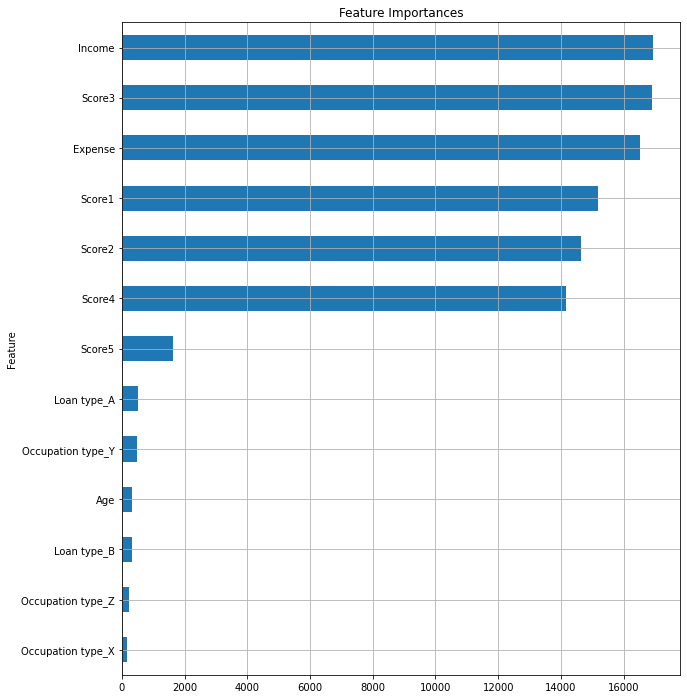

<Figure size 432x288 with 0 Axes>

In [52]:
# Obtain scores of features
feature_scores = lgbm_clf.feature_importances_
importance = pd.DataFrame({'Feature': fx.columns , 'Importance': feature_scores})
importance = importance.sort_values(by='Importance', ascending=True)
importance = importance.set_index(importance['Feature'])

# Plot horizontal bar plot
plt.figure(figsize=(10,12))
importance['Importance'].plot.barh()
plt.title('Feature Importances')
plt.grid()
plt.show()
plt.savefig('FeatImpRaw.png',dpi = 400)